In [1]:
import pandas as pd, numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os, json

In [2]:
import scienceplots
import matplotlib.ticker as ticker
plt.style.use(['science'])
FIG_WIDTH = 7.5  # width of figure in inches (a4 width)
TARGET_FOLDER = "/home/masc12/dev/masc12-mthesis/eda/img-eda/plots"

In [3]:
webcams = ['altenrhein', 'ebenalp', 'golfclub-erlen', 'kronberg', 'romanshorn', 'rorschacherberg', 'sitterdorf', 'wiler-turm']
wbc_cmap = json.loads(open('webcam_colormap.json').read())

In [4]:
webcam_indicator = []
timesteps = []
filesizes = []

for wbc in webcams:
    wbc = "ebenalp" if wbc == "elbenalp" else wbc
    for file in os.listdir(f'../../data/{wbc}'):
        ts = dt.datetime.strptime(file, "%Y-%m-%d_%H-%M-%S.jpg")
        size = int(os.path.getsize(f'../../data/{wbc}/{file}'))
        
        webcam_indicator.append(wbc)
        timesteps.append(ts)
        filesizes.append(size)

df_filesizes = pd.DataFrame({"webcam": webcam_indicator, "timestamp": timesteps, "filesize_mb": [x/1024/1024 for x in filesizes]})

# file size boxplot per camera

<Figure size 350x262.5 with 0 Axes>

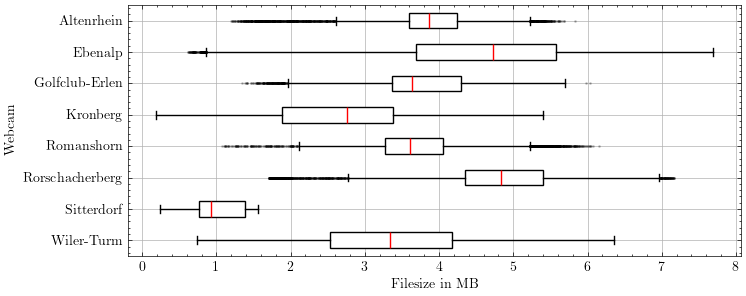

In [5]:
plt.clf()
plt.figure(figsize=(FIG_WIDTH, 3))
plt.boxplot(
    [df_filesizes[df_filesizes["webcam"] == wbc]["filesize_mb"] for wbc in list(reversed(webcams))], 
    tick_labels=[w.title() for w in reversed(webcams)],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='white', color='black'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markersize=1, markerfacecolor='black', linestyle='none', alpha=0.2),
)
# plt.title('Filesize distribution of webcam images')
plt.xlabel('Filesize in MB')
plt.ylabel('Webcam')
# plt.xticks(rotation=45)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.tight_layout(pad=0.5)
plt.savefig(f"{TARGET_FOLDER}/filesize-boxplot.png", dpi=300)
plt.show()

# histogram filesize count

<Figure size 350x262.5 with 0 Axes>

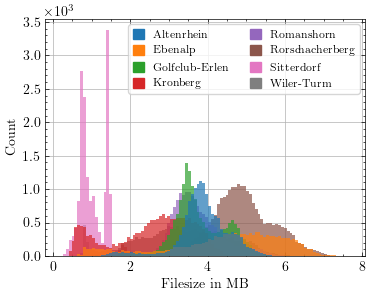

In [12]:
# filesize histogram per webcam
plt.clf()
plt.figure(figsize=(FIG_WIDTH/2, 3))
plt.hist(
    [df_filesizes[df_filesizes["webcam"] == wbc]["filesize_mb"] for wbc in webcams],
    bins=100,
    label=webcams, 
    color=[wbc_cmap[wbc] for wbc in webcams], 
    histtype='stepfilled', 
    alpha=0.7
)
plt.ylabel('Count')
plt.xlabel('Filesize in MB')

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.grid(True)
plt.gca().set_axisbelow(True)

# plt.title('Filesize distribution of webcam images')

handles = [plt.Rectangle((0,0),1,1, color=wbc_cmap[wbc]) for wbc in webcams]
plt.legend(handles, [w.title() for w in webcams], frameon=True, loc='upper right', handlelength=1, handleheight=1, ncol=2, fontsize=8)

plt.tight_layout(pad=0.5)
plt.savefig(f"{TARGET_FOLDER}/filesize-histogram-joined.png", dpi=300)
plt.show()

<Figure size 350x262.5 with 0 Axes>

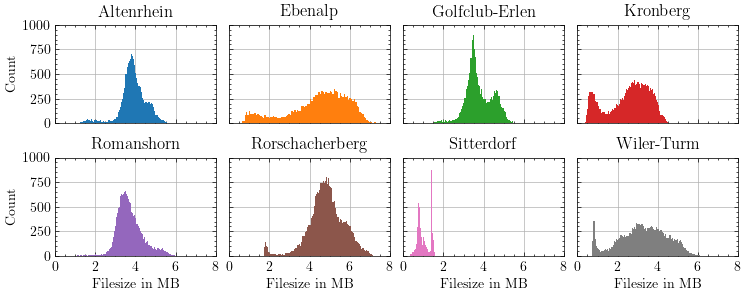

In [13]:
plt.clf()

fig, axes = plt.subplots(2, 4, figsize=(FIG_WIDTH, 3), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
# fig.suptitle('Filesize distribution of webcam images')

for i, wbc in enumerate(webcams):
    ax = axes[i//4, i%4]
    ax.hist(df_filesizes[df_filesizes["webcam"] == wbc]["filesize_mb"], bins=100, color=wbc_cmap[wbc])
    ax.set_title(wbc.title())
    
    ax.set_xlabel('Filesize in MB') if i > 3 else None
    ax.set_ylabel('Count') if i % 4 == 0 else None
    
    ax.set_ylim(0, 1000)
    ax.set_yticks([0, 250, 500, 750, 1000])

    ax.set_xlim(0, 8)
    ax.set_xticks([0, 2, 4, 6, 8])
    

    ax.grid(True)
    ax.set_axisbelow(True)
    # tick freq


plt.tight_layout(pad=0.5)
plt.savefig(f"{TARGET_FOLDER}/filesize-histogram-per-webcam.png", dpi=300)
plt.show()

# filesize over time

In [8]:
lowest = df_filesizes.groupby("webcam")["timestamp"].min().max() +  dt.timedelta(hours=10)
highest = df_filesizes.groupby("webcam")["timestamp"].max().min() - dt.timedelta(hours=13, minutes=40)
lowest, highest

(Timestamp('2024-09-20 00:10:00'), Timestamp('2025-03-13 22:30:00'))

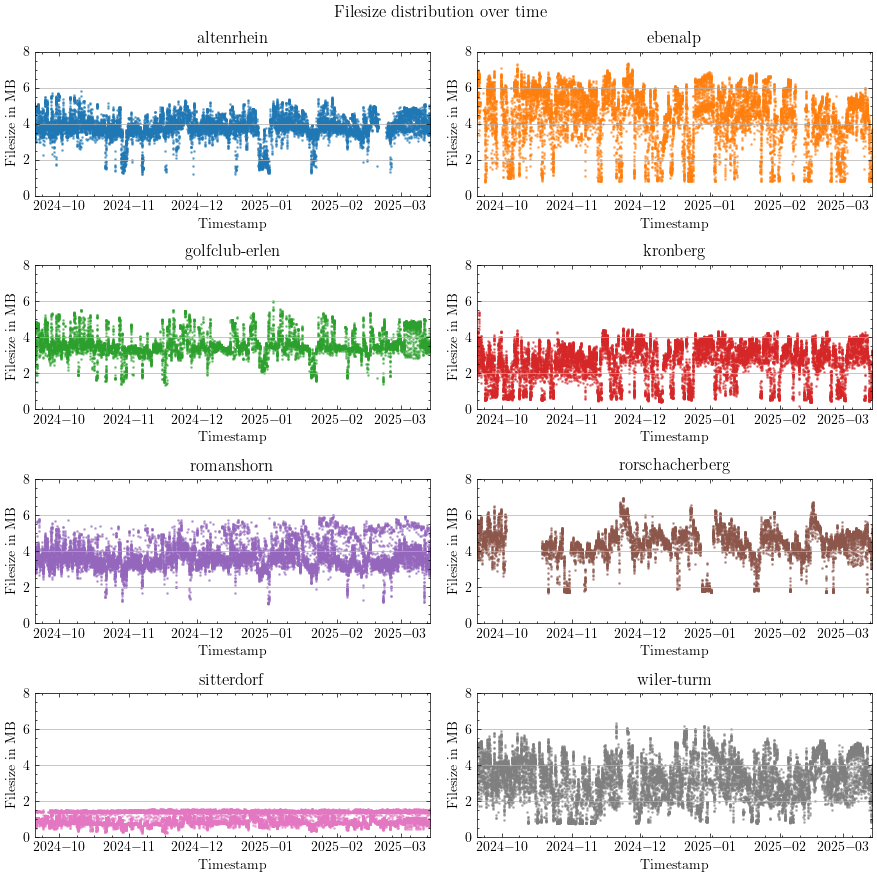

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(9, 9))
fig.suptitle('Filesize distribution over time')
for i, wbc in enumerate(webcams):
    ax = axes[i//2, i%2]
    subset = df_filesizes[df_filesizes["webcam"] == wbc]

    # median = subset.groupby(subset["timestamp"].dt.date)["filesize_mb"].median()
    # std = subset.groupby(subset["timestamp"].dt.date)["filesize_mb"].std()

    # ax.plot(median.index, median, color=wbc_cmap[wbc])
    # ax.fill_between(median.index, median-std, median+std, color=wbc_cmap[wbc], alpha=0.2)

    ax.scatter(subset["timestamp"], subset["filesize_mb"], color=wbc_cmap[wbc], alpha=0.5, s=1)


    ax.set_ylabel('Filesize in MB')
    ax.set_ylim(0, 8)

    ax.set_xlabel('Timestamp')
    ax.set_xlim(lowest, highest)

    ax.set_title(wbc)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

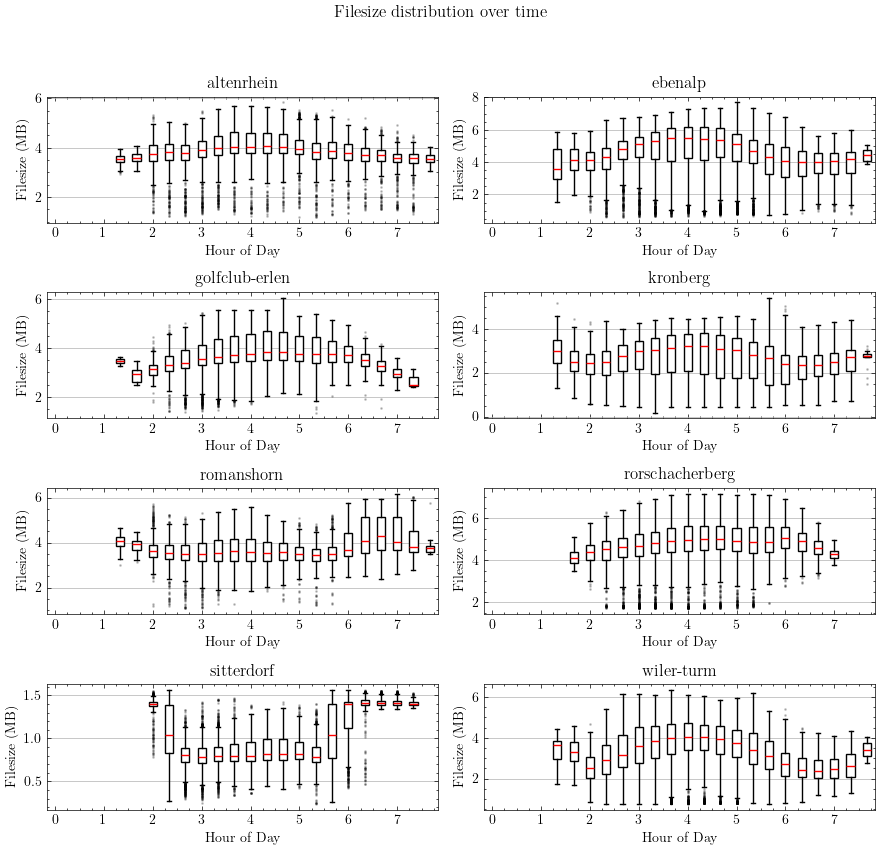

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 2, figsize=(9, 9))
fig.suptitle('Filesize distribution over time')

for i, wbc in enumerate(webcams):
    ax = axes[i // 2, i % 2]
    subset = df_filesizes[df_filesizes["webcam"] == wbc]

    # Group by hour of day and collect file sizes
    grouped = [subset[subset["timestamp"].dt.hour == hour]["filesize_mb"] for hour in range(24)]
    
    ax.boxplot(
        grouped, 
        positions=range(24),
        patch_artist=True,
        boxprops=dict(facecolor='white', color='black'),
        medianprops=dict(color='red'),
        flierprops=dict(marker='o', markersize=1, markerfacecolor='black', linestyle='none', alpha=0.2)
    )
    
    ax.set_title(wbc)
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Filesize (MB)")
    ax.set_xticks(range(0, 24, 3))
    ax.grid(axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for the suptitle
plt.show()


# Filesize distribution over time of day (colored by date) 

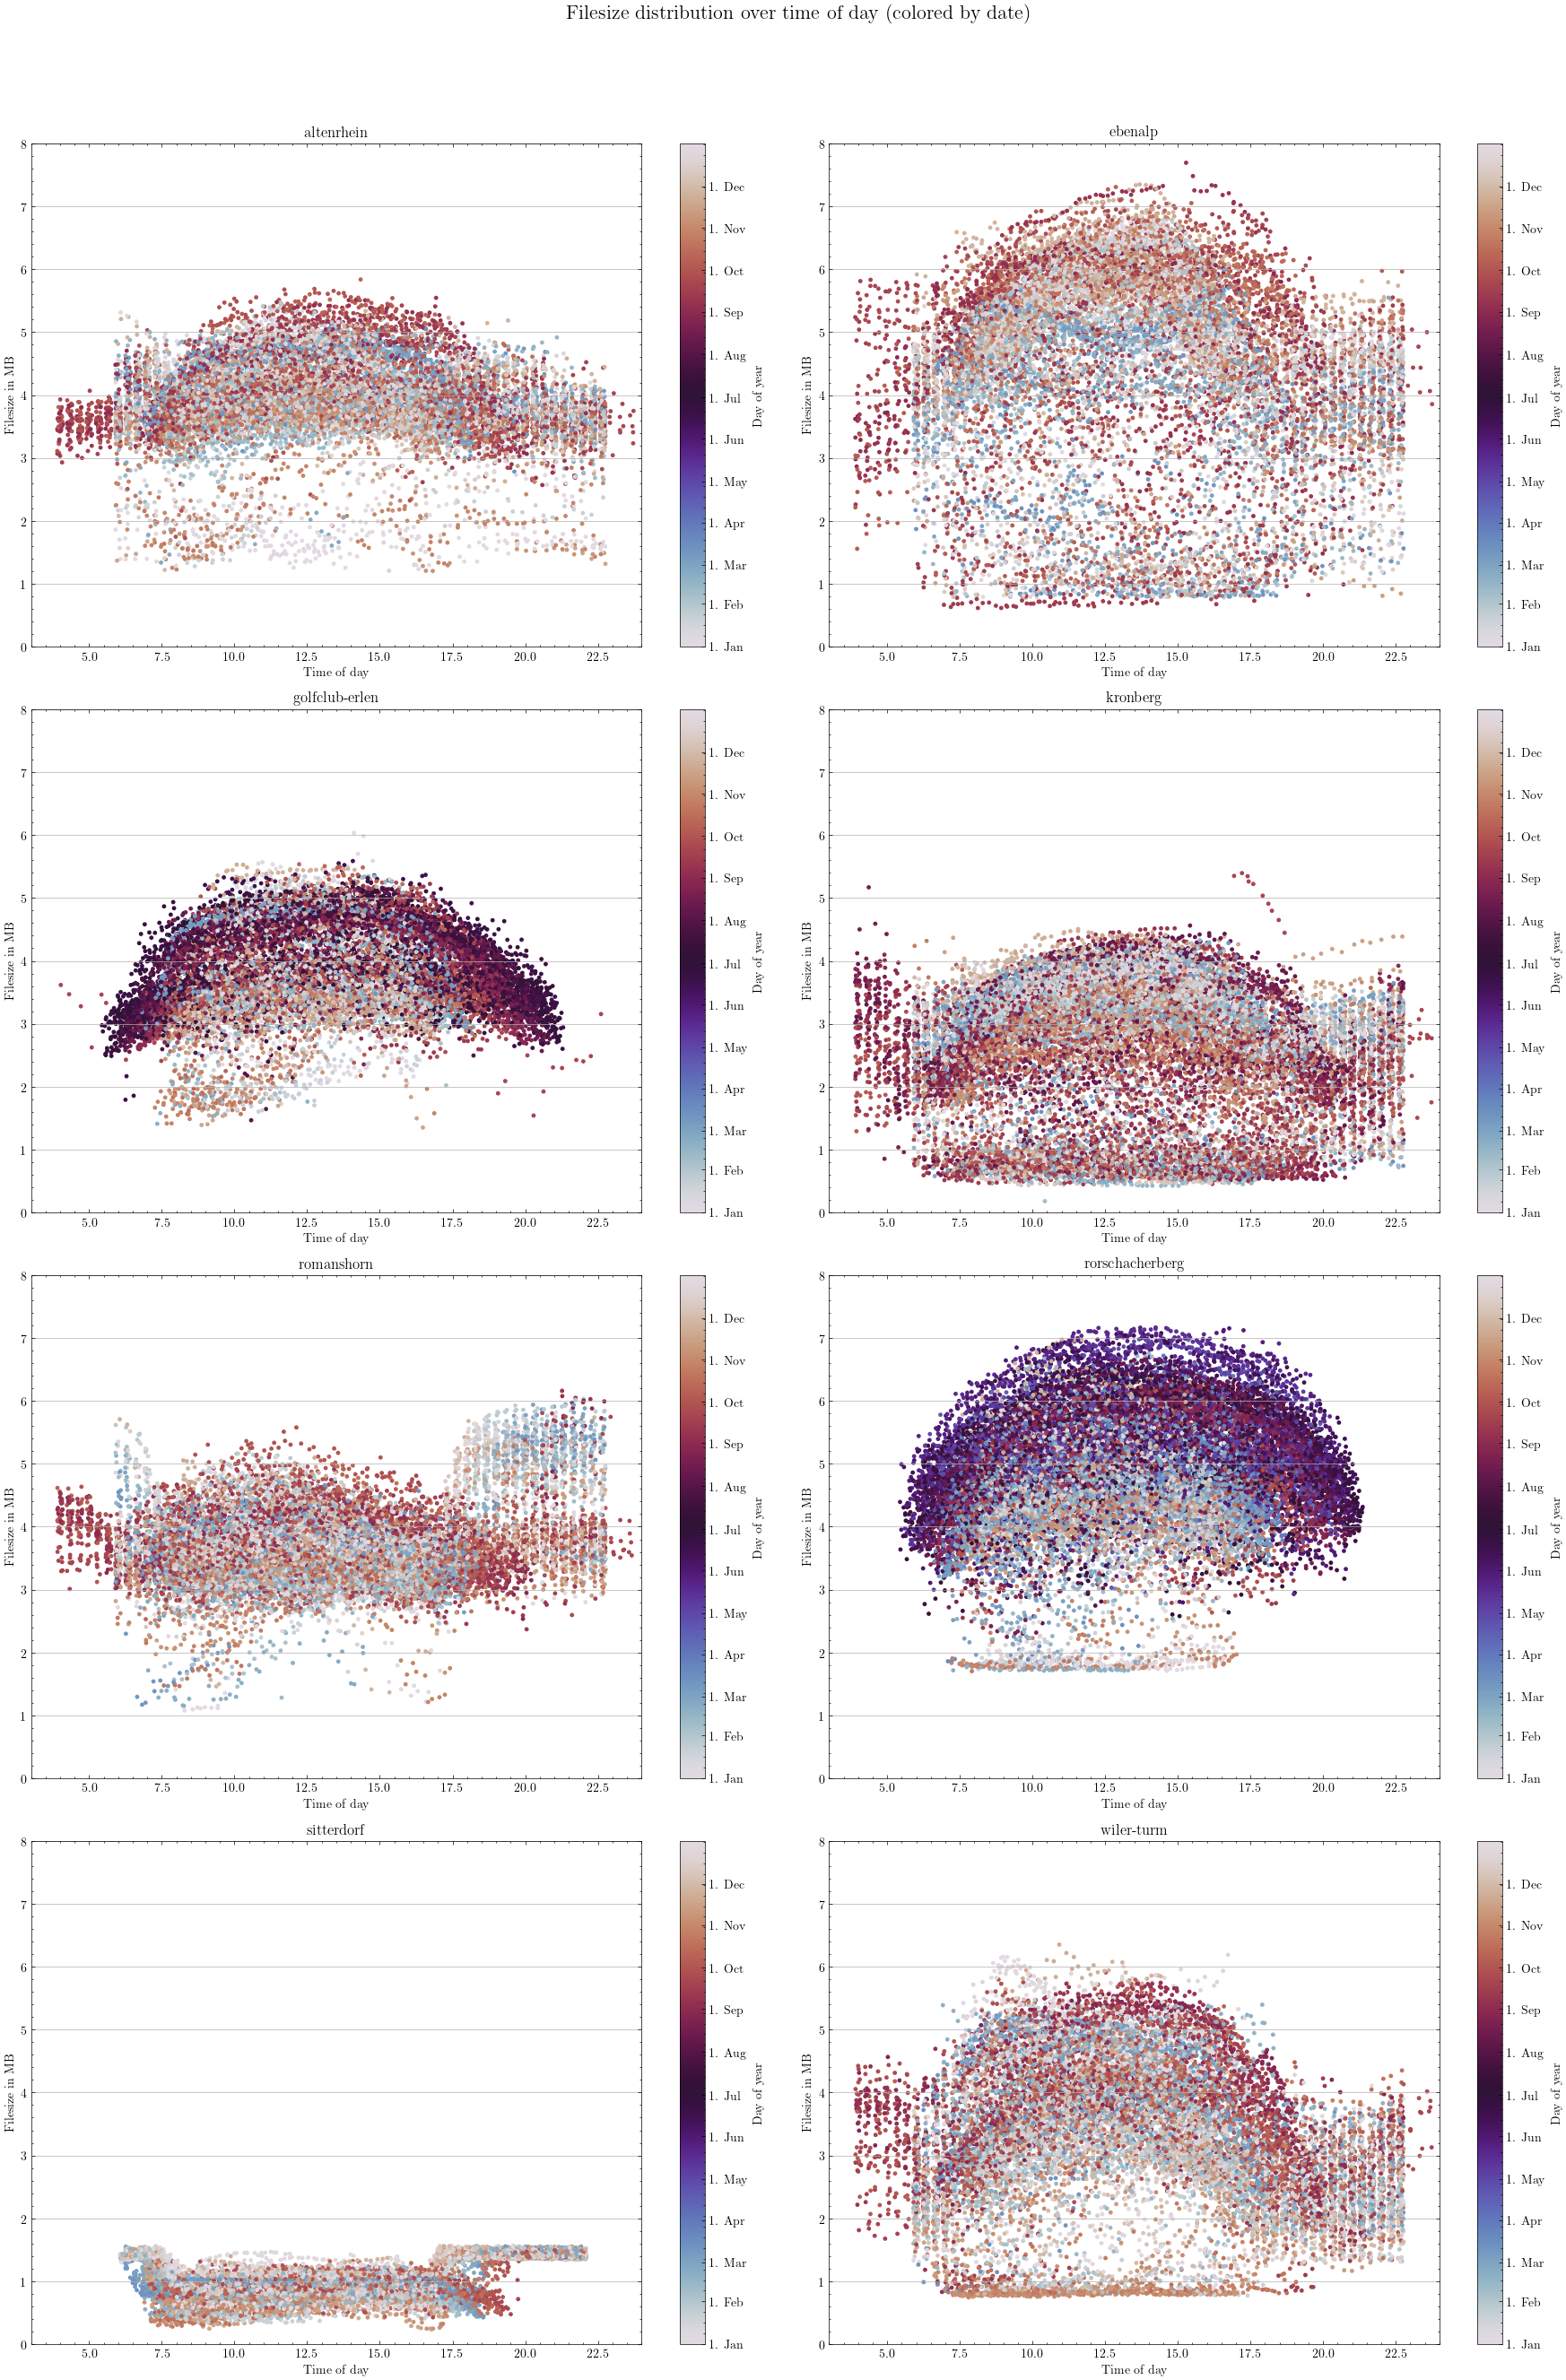

In [11]:
df = df_filesizes.copy()

fig, axes = plt.subplots(4, 2, figsize=(18, 28))
for i, wbc in enumerate(webcams):
    ax = axes[i//2, i%2]
    
    # ax.axvspan(3, 24, color='darkgrey')
    
    # subset = df[(df["webcam"] == wbc) & (df["timestamp"] >= lowest) & (df["timestamp"] <= highest)]
    subset = df[df["webcam"] == wbc]


    dates_col = subset["timestamp"].dt.dayofyear

    time_x = subset["timestamp"].dt.hour + subset["timestamp"].dt.minute / 60
    jitter = np.random.uniform(-0.1, 0.1, size=len(time_x))  # Adjust the range as needed
    time_x_jittered = time_x + jitter
    
    scatter = ax.scatter(time_x_jittered, subset["filesize_mb"], c=dates_col, cmap='twilight', s=6)
    ax.set_ylabel('Filesize in MB')
    ax.set_ylim(0, 8)

    ax.set_xlabel('Time of day')
    ax.set_xlim(3, 24)
    ax.grid(axis='y')
    ax.set_title(wbc)

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Day of year')
    cbar.set_ticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335])
    cbar.set_ticklabels(['1. Jan', '1. Feb', '1. Mar', '1. Apr', '1. May', '1. Jun', '1. Jul', '1. Aug', '1. Sep', '1. Oct', '1. Nov', '1. Dec'])

fig.suptitle('Filesize distribution over time of day (colored by date)', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()